In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data  

In [145]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
severity_type = pd.read_csv('data/severity_type.csv')
resource_type = pd.read_csv('data/resource_type.csv')
event_type = pd.read_csv('data/event_type.csv')
log_feature = pd.read_csv('data/log_feature.csv')

In [146]:
print('-----------  Train  ----------')
print(train.head())
print('size:', train.shape[0])
print('\n----------   Test   -----------')
print(test.head())
print('size:', test.shape[0])
print('\n-------- Severity_type --------')
print(severity_type.head())
print('size:', severity_type.shape[0])
print('\n-------- Resource_type --------')
print(resource_type.head())
print('size:', resource_type.shape[0])
print('\n--------  Event_type  --------')
print(event_type.head())
print('size:', event_type.shape[0])
print('\n--------  Log_feature  --------')
print(log_feature.head())
print('size:', log_feature.shape[0])

-----------  Train  ----------
      id      location  fault_severity
0  14121  location 118               1
1   9320   location 91               0
2  14394  location 152               1
3   8218  location 931               1
4  14804  location 120               0
size: 7381

----------   Test   -----------
      id      location
0  11066  location 481
1  18000  location 962
2  16964  location 491
3   4795  location 532
4   3392  location 600
size: 11171

-------- Severity_type --------
     id    severity_type
0  6597  severity_type 2
1  8011  severity_type 2
2  2597  severity_type 2
3  5022  severity_type 1
4  6852  severity_type 1
size: 18552

-------- Resource_type --------
     id    resource_type
0  6597  resource_type 8
1  8011  resource_type 8
2  2597  resource_type 8
3  5022  resource_type 8
4  6852  resource_type 8
size: 21076

--------  Event_type  --------
     id     event_type
0  6597  event_type 11
1  8011  event_type 15
2  2597  event_type 15
3  5022  event_type 15
4  5

In [147]:
print('-----------  Train  ----------')
print(train.info())
print('\n----------   Test   -----------')
print(test.info())
print('\n-------- Severity_type --------')
print(severity_type.info())
print('\n-------- Resource_type --------')
print(resource_type.info())
print('\n--------  Event_type  --------')
print(event_type.info())
print('\n--------  Log_feature  --------')
print(log_feature.info())

-----------  Train  ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB
None

----------   Test   -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 2 columns):
id          11171 non-null int64
location    11171 non-null object
dtypes: int64(1), object(1)
memory usage: 174.6+ KB
None

-------- Severity_type --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18552 entries, 0 to 18551
Data columns (total 2 columns):
id               18552 non-null int64
severity_type    18552 non-null object
dtypes: int64(1), object(1)
memory usage: 290.0+ KB
None

-------- Resource_type --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
id        

Nos damos cuenta que no tenemos valores perdidos, el dataset con mas entradas es 'log_feature' con 58671

## Analyzing each dataset

### Train

In [148]:
train.location.value_counts()/train.shape[0]

location 821     0.011516
location 1107    0.010568
location 734     0.010161
location 126     0.009619
location 1008    0.009619
location 810     0.008942
location 600     0.008671
location 704     0.008264
location 242     0.008129
location 124     0.007993
location 1052    0.007858
location 122     0.007587
location 684     0.007587
location 793     0.007452
location 834     0.007316
location 653     0.007181
location 1019    0.007181
location 798     0.007045
location 763     0.006910
location 846     0.006774
location 91      0.006639
location 976     0.006503
location 1100    0.006097
location 471     0.006097
location 962     0.006097
location 102     0.005961
location 1042    0.005826
location 244     0.005555
location 808     0.005419
location 995     0.005419
                   ...   
location 592     0.000135
location 250     0.000135
location 434     0.000135
location 6       0.000135
location 538     0.000135
location 659     0.000135
location 933     0.000135
location 391

Vemos que existen 929 ubicaciones diferentes en el archivo train. La ubicacion que mas se repite es la 821 con el 1.15% de los registros

In [149]:
100*(train.fault_severity.value_counts()/train.shape[0])

0    64.815066
1    25.348869
2     9.836066
Name: fault_severity, dtype: float64

Text(0.5, 0, 'Clases')

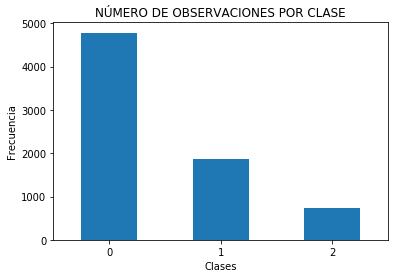

In [150]:
count_classes = pd.value_counts(train.fault_severity, sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('NÚMERO DE OBSERVACIONES POR CLASE')
plt.ylabel('Frecuencia')
plt.xlabel('Clases')

Detectamos un problema de clases desbalanceadas, la clase 0 aparece en el 64.8% de los registros, la clase 1 en el 25.3% y la mas interesante para Telstra y para el análisis, la clase 2 aparece en el 9.8% unicamente

### Test

In [151]:
test.location.value_counts()/test.shape[0]

location 734     0.009757
location 653     0.009668
location 1107    0.009489
location 126     0.009489
location 810     0.009131
location 704     0.009131
location 821     0.008773
location 684     0.008683
location 793     0.008594
location 1019    0.008504
location 1008    0.008146
location 1052    0.007878
location 834     0.007878
location 962     0.007699
location 124     0.007609
location 995     0.007519
location 244     0.007161
location 763     0.007072
location 122     0.006982
location 1100    0.006982
location 798     0.006445
location 600     0.006445
location 613     0.006356
location 242     0.006177
location 976     0.005908
location 102     0.005819
location 118     0.005729
location 1042    0.005640
location 465     0.005640
location 845     0.005550
                   ...   
location 1062    0.000090
location 565     0.000090
location 370     0.000090
location 572     0.000090
location 207     0.000090
location 611     0.000090
location 162     0.000090
location 585

En el archivo test tenemos 1039 ubicaciones diferentes. 

### Train + Test

In [152]:
completo = pd.concat([train, test], axis=0, sort=False)

In [153]:
len(completo.id.unique())

18552

Tenemos 18552 id's diferentes, por lo que ninguno se repite en train y test. 

In [154]:
100*(completo.location.value_counts()/completo.shape[0])

location 734     0.991807
location 1107    0.991807
location 821     0.986417
location 126     0.954075
location 810     0.905563
location 704     0.878611
location 1008    0.873221
location 653     0.867831
location 684     0.824709
location 793     0.813928
location 1019    0.797758
location 1052    0.786977
location 124     0.776197
location 834     0.765416
location 600     0.733075
location 122     0.722294
location 962     0.706123
location 763     0.700733
location 242     0.695343
location 798     0.668392
location 995     0.668392
location 1100    0.663001
location 244     0.652221
location 976     0.614489
location 613     0.592928
location 102     0.587538
location 846     0.587538
location 1042    0.571367
location 845     0.544416
location 471     0.539025
                   ...   
location 196     0.005390
location 250     0.005390
location 254     0.005390
location 331     0.005390
location 366     0.005390
location 572     0.005390
location 207     0.005390
location 5  

Tenemos 1126 ubicaciones diferentes, 734 es la mas repetida

### Event type

In [155]:
event_type.shape

(31170, 2)

In [156]:
100*(event_type.event_type.value_counts()/event_type.shape[0])

event_type 11    25.306384
event_type 35    21.222329
event_type 34    19.015079
event_type 15    14.100096
event_type 20     4.677575
event_type 54     2.194418
event_type 13     1.867180
event_type 42     1.533526
event_type 44     1.495027
event_type 23     1.376323
event_type 14     1.058710
event_type 43     0.981713
event_type 22     0.715432
event_type 50     0.494065
event_type 10     0.465191
event_type 21     0.436317
event_type 18     0.234200
event_type 47     0.221367
event_type 26     0.208534
event_type 32     0.202117
event_type 30     0.192493
event_type 45     0.170035
event_type 24     0.147578
event_type 27     0.141161
event_type 29     0.134745
event_type 40     0.128329
event_type 46     0.121912
event_type 2      0.118704
event_type 28     0.102663
event_type 8      0.093038
event_type 6      0.089830
event_type 5      0.083414
event_type 7      0.076997
event_type 3      0.060956
event_type 38     0.060956
event_type 36     0.057748
event_type 39     0.057748
e

In [157]:
len(event_type.event_type.unique())

53

Los eventos con mas frecuencia son event_type 11 y 35, con el 25.3% y 21.2% de los datos

**Inferencias:**
*El numero de resgitros en este dataset es de 31,170, el numero de id´s unicos es de 18,552, por lo tanto un id puede estar asociado a mas de un evento diferente*

### Resource

In [158]:
resource_type.shape

(21076, 2)

In [159]:
len(resource_type.resource_type.value_counts())

10

In [160]:
100*(resource_type.resource_type.value_counts()/resource_type.shape[0])

resource_type 8     48.718922
resource_type 2     42.313532
resource_type 6      2.761435
resource_type 7      2.362877
resource_type 4      1.565762
resource_type 9      0.901499
resource_type 3      0.687986
resource_type 10     0.346366
resource_type 1      0.275195
resource_type 5      0.066426
Name: resource_type, dtype: float64

Tenemos 10 tipos de recursos diferentes, al igual que el dataset de eventos, un id puede estar asociado a mas de un tipo de recurso diferente. Los recursos que aparecen con mas frecuencia son el de tipo 8 y el de tipo 2 con un 48.7% y un 42.3%

### Severity type 

In [161]:
severity_type.shape

(18552, 2)

In [162]:
len(severity_type.severity_type.value_counts())

5

In [163]:
100*(severity_type.severity_type.value_counts()/severity_type.shape[0])

severity_type 2    47.094653
severity_type 1    47.046141
severity_type 4     5.465718
severity_type 5     0.350367
severity_type 3     0.043122
Name: severity_type, dtype: float64

Tenemos 5 tipos diferentes de severidades, la severidad del tipo dos aparece en el 47% de los registros, al igual que la severidad del tipo 1.  

**Por el número de registros sabemos que solo existe un tipo de severidad por id**

### Log feature

In [164]:
log_feature.shape

(58671, 3)

In [165]:
len(log_feature.log_feature.value_counts())

386

In [166]:
100*(log_feature.log_feature.value_counts()/log_feature.shape[0])

feature 312    8.977178
feature 232    8.102811
feature 82     5.917745
feature 203    4.811576
feature 313    3.655980
feature 233    3.240102
feature 307    2.721958
feature 54     2.681052
feature 170    2.600944
feature 71     2.580491
feature 315    2.548107
feature 134    2.418571
feature 80     2.277105
feature 235    2.205519
feature 193    1.977127
feature 219    1.963491
feature 68     1.862931
feature 227    1.840773
feature 314    1.619199
feature 201    1.537386
feature 234    1.503298
feature 73     1.479436
feature 195    1.334561
feature 301    1.205025
feature 309    1.068671
feature 55     0.961293
feature 229    0.954475
feature 273    0.836870
feature 308    0.824939
feature 368    0.787442
                 ...   
feature 300    0.001704
feature 352    0.001704
feature 364    0.001704
feature 363    0.001704
feature 19     0.001704
feature 96     0.001704
feature 355    0.001704
feature 210    0.001704
feature 336    0.001704
feature 192    0.001704
feature 32     0

Tenemos 386 features diferentes y un total de 58671 registros, esto quiere decir que un id estar asociado a mas de uns feature diferente